In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


In [16]:
# Tải và chuẩn bị dữ liệu MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [17]:
# Chuẩn hóa dữ liệu (đưa giá trị pixel về khoảng 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0


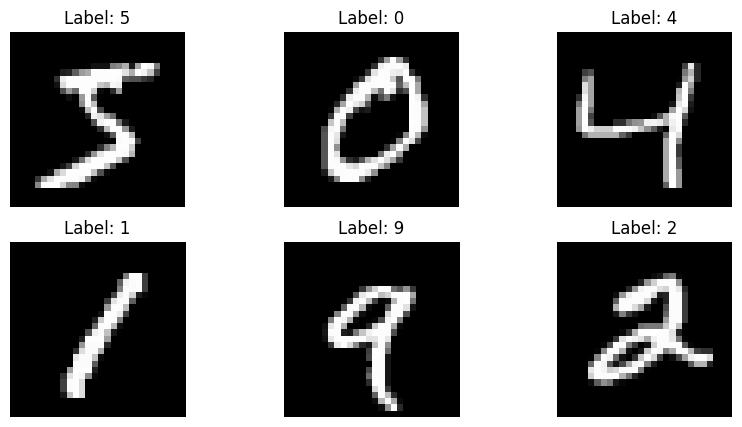

In [18]:
# Hiển thị vài mẫu ảnh
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


In [19]:
# Xây dựng mô hình mạng nơ-ron
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Chuyển ma trận 28x28 thành vector 784 phần tử
    Dense(128, activation='relu'),       # Lớp ẩn với 128 nơ-ron và hàm kích hoạt ReLU
    Dense(10, activation='softmax')      # Lớp đầu ra với 10 nơ-ron, tương ứng 10 chữ số (0-9)
])


In [20]:
# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
# Huấn luyện mô hình
model.fit(train_images, train_labels, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - loss: 0.4800 - val_accuracy: 0.9546 - val_loss: 0.1579
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9626 - loss: 0.1319 - val_accuracy: 0.9679 - val_loss: 0.1109
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0875 - val_accuracy: 0.9730 - val_loss: 0.0953
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9732 - val_loss: 0.0922
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0494 - val_accuracy: 0.9719 - val_loss: 0.0942
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0369 - val_accuracy: 0.9747 - val_loss: 0.0848
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0276 - val_accuracy: 0.9740 - val_loss: 0.0903
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0219 - 

In [22]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Độ chính xác trên tập kiểm tra: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.1829
Độ chính xác trên tập kiểm tra: 97.89%


In [23]:
# Dự đoán một số ảnh từ tập kiểm tra
predictions = model.predict(test_images[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


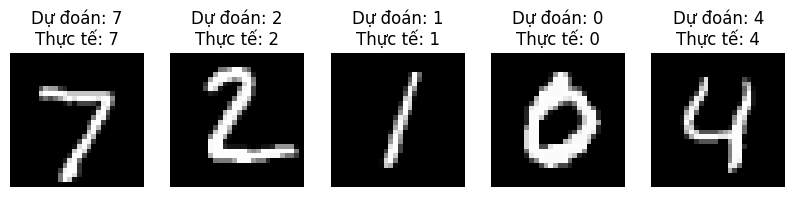

In [31]:
# Hiển thị kết quả dự đoán
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Dự đoán: {predictions[i].argmax()}\nThực tế: {test_labels[i]}")
    plt.axis('off')
plt.show()


In [25]:
model.save("mnist_digit_model.h5")
